# Basic Mathmatics by Python

Atsushi Ishida (aishida@kwansei.ac.jp)

In [1]:
%matplotlib inline 

## 1章  論理

論理和$\lor$の真理表

In [2]:
print('  p  |   q   |  p | q')
print('-----------------------')
for p in (True, False):
    for q in (True, False):
        print(p,'|', q,'|', p | q)

  p  |   q   |  p | q
-----------------------
True | True | True
True | False | True
False | True | True
False | False | False


ちなみに，numpyパッケージを使って以下のようにもできる．

In [3]:
import numpy as np
p = np.array([True, True, False, False])
q = np.array([True, False, True, False])
p_or_q = p | q
print(np.column_stack([p,q, p_or_q]))

[[ True  True  True]
 [ True False  True]
 [False  True  True]
 [False False False]]


論理積$\land$の真理表

In [4]:
print('  p  |   q   |  p & q')
print('-----------------------')
for p in (True, False):
    for q in (True, False):
        print(p,'|', q,'|', p & q)

  p  |   q   |  p & q
-----------------------
True | True | True
True | False | False
False | True | False
False | False | False


否定$\lnot$の真理表

In [5]:
print('  p  |   not p')
print('----------------')
for p in (True, False):
    print(p,'|', not p)

  p  |   not p
----------------
True | False
False | True


p.9 式(1.4) $\neg p \lor \neg q$

In [6]:
print('  p  |   q   |  (not p) | (not q)')
print('-----------------------')
for p in (True, False):
    for q in (True, False):
        print(p,'|', q,'|', (not p) | (not q))

  p  |   q   |  (not p) | (not q)
-----------------------
True | True | False
True | False | True
False | True | True
False | False | True


条件式$\to$と同値の真理表

In [7]:
print('  p  |   q   |  (not p) | q')
print('-----------------------')
for p in (True, False):
    for q in (True, False):
        print(p,'|', q,'|',  (not p) | q)

  p  |   q   |  (not p) | q
-----------------------
True | True | True
True | False | False
False | True | True
False | False | True


双条件式$\leftrightarrow$と同値の真理表

In [8]:
print('  p  |   q   |  (p & q) | ((not p) & (not q))')
print('-----------------------')
for p in (True, False):
    for q in (True, False):
        print(p,'|', q,'|', (p & q) | ((not p) & (not q)))

  p  |   q   |  (p & q) | ((not p) & (not q))
-----------------------
True | True | True
True | False | False
False | True | False
False | False | True


## 2章  集合

Pythonにはデフォルトで集合型オブジェクトset(), { }がある．

要素：$a \in A$

In [9]:
A = {1,2,3}
B = {1,2,3,4,5}
C = {3,4,5}
for a in B:
    print(a,' in A is', a in A)

1  in A is True
2  in A is True
3  in A is True
4  in A is False
5  in A is False


部分集合関係：$A\subset B$

In [10]:
print('A <= B is', A <= B)
print('C <= B is', C <= B)
print('A <= C is', A <= C)

A <= B is True
C <= B is True
A <= C is False


空集合：$\emptyset$

In [11]:
EmpSet = set()
print('EmpSet <= A is', EmpSet <= A)

EmpSet <= A is True


和集合：$A \cup B$

In [12]:
print('A | B =', A | B)
print('C | B =', C | B)
print('A | C =', A | C)

A | B = {1, 2, 3, 4, 5}
C | B = {1, 2, 3, 4, 5}
A | C = {1, 2, 3, 4, 5}


積集合：$A \cap B$

In [13]:
print('A & B =', A & B)
print('C & B =', C & B)
print('A & C =', A & C)

A & B = {1, 2, 3}
C & B = {3, 4, 5}
A & C = {3}


補集合：$A^c$

In [14]:
# Bを全体集合とする
print('A^B =', A^B)
print('C^B =', C^B)

A^B = {4, 5}
C^B = {1, 2}


さらに本格的に集合操作したい場合はSymPyのFiniteSetを使う（『Pythonからはじめる数学入門』5章）．

In [15]:
from sympy import FiniteSet as fset

べき集合

In [16]:
D = fset(1,2,3)
D_ps = D.powerset()
print('Power set of', D, 'is', D_ps)

Power set of {1, 2, 3} is {EmptySet(), {1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}, {1, 2, 3}}


直積

In [17]:
S = fset(1,2)
T = fset(3,4)
P = S*T
print(P, 'includes:')
for e in P:
    print(e)

{1, 2} x {3, 4} includes:
(1, 3)
(1, 4)
(2, 3)
(2, 4)


`matplotlib_venn`パッケージを使うとベン図が書ける．ただし，別途パッケージのインストールが必要．
インストールはAnacondaの場合Anaconda prompt上で，
```
conda install -c conda-forge matplotlib-venn
```
を実行．Pythonを直接入れてる場合は`pip install matplotlib-venn`でやる（Anaconda環境で`pip`を使うと[ややこしいことになるらしい
](http://onoz000.hatenablog.com/entry/2018/02/11/142347)）．

ベン図には各領域に入る要素数が表示される．

In [18]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

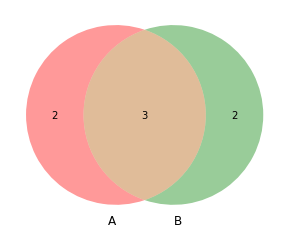

In [19]:
A = fset(1,2,3,4,5)
B = fset(3,4,5,6,7)
venn2([A,B])
plt.show()

# 3章　微分

極限：$\lim_{x\to a} f(x)$は`sympy`の`limit`関数が使える．`Limit`はlimit演算のクラスで`.doit()`メソッドで`limit`と同じ操作になる．無限は`oo`．

In [20]:
from sympy import *
init_printing()

変数は`symbols`で定義する．

In [21]:
x = symbols('x')

In [22]:
Eq(Limit(x,x,oo),Limit(x,x,oo).doit())

In [23]:
Eq(Limit(x,x,1),Limit(x,x,1).doit())

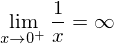

In [24]:
Eq(Limit(1/x,x,0),Limit(1/x,x,0).doit())

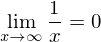

In [25]:
Eq(Limit(1/x,x,oo),Limit(1/x,x,oo).doit())

微分係数を求める．練習問題3.2.1(p.64)

In [26]:
x, a = symbols('x a')

In [27]:
Eq(Limit((x - a)/(x - a),x,a),Limit((x - a)/(x - a),x,a).doit())

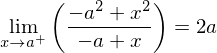

In [28]:
Eq(Limit((x**2 - a**2)/(x - a),x,a),
   Limit((x**2 - a**2)/(x - a),x,a).doit())

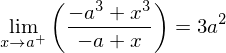

In [29]:
Eq(Limit((x**3 - a**3)/(x - a),x,a),
   Limit((x**3 - a**3)/(x - a),x,a).doit())

微分して導関数を求める．微分演算のクラスは`Derivative`．もっとも単純には`diff(func, var)`関数を用いる．

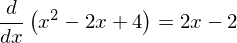

In [30]:
f = x**2 - 2*x + 4
f_dash = diff(f,x) #Derivative(f).doit()
Eq(Derivative(f),f_dash)

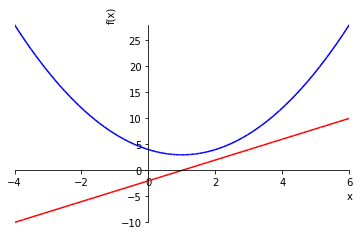

In [31]:
p = plot(f,(x,-4,6),line_color = 'b', show = False)
p.extend(plot(f_dash,(x,-4,6),line_color = 'r', show = False))
p.show()

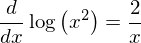

In [32]:
f = log(x**2)
f_dash = diff(f,x) #Derivative(f).doit()
Eq(Derivative(f),f_dash)

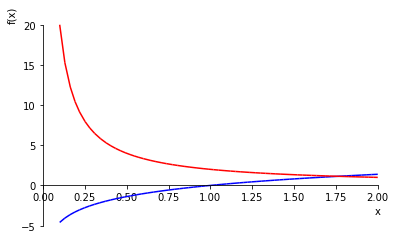

In [33]:
p = plot(f,(x,0.1,2),axis_center = (0,0), xlim = [0,2],
         line_color = 'b', show = False)
p.extend(plot(f_dash,(x,0.1,2),axis_center = (0,0), xlim = [0,2],
              line_color = 'r', show = False))
p.show()

# 4章 積分

積分演算のクラスは`Integral`，関数は`integrate`．

In [34]:
from sympy import *
x = symbols('x')

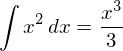

In [35]:
f = x**2
F = integrate(f,x) #Integral(f).doit()
Eq(Integral(f,x),F)

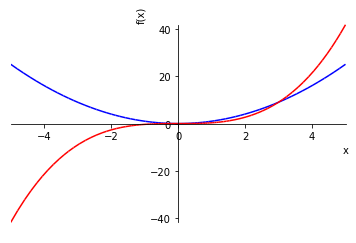

In [36]:
p = plot(f,(x,-5,5),line_color = 'b', show = False)
p.extend(plot(F,(x,-5,5),line_color = 'r', show = False))
p.show()

定積分．

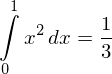

In [37]:
Eq(Integral(f,(x,0,1)),F.subs(x,1)-F.subs(x,0)) #integrate(f,(x,0,1))

ロジスティック分布（$\mu =0, s = 1$）．

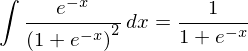

In [38]:
logistic_pdf = exp(-x)/(1 + exp(-x))**2
logistic_cdf = integrate(logistic_pdf, x)
Eq(Integral(logistic_pdf,x),logistic_cdf)

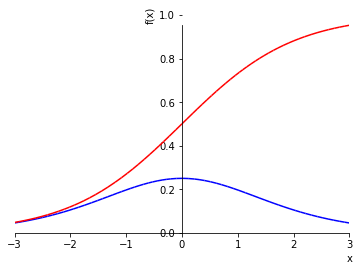

In [39]:
p = plot(logistic_pdf,(x,-3,3),line_color = 'b', show = False)
p.extend(plot(logistic_cdf,(x,-3,3),line_color = 'r',
              show = False))
p.show()